In [206]:
import sqlite3
print(sqlite3.sqlite_version_info)

(3, 36, 0)


In [207]:
import sqlite3, os
print(sqlite3.sqlite_version_info)
major, minor, _ = sqlite3.sqlite_version_info
if minor < 35:
  !curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
  %cd sqlite/
  !./configure
  !make sqlite3.c
  %cd /content
  !npx degit coleifer/pysqlite3 -f
  !cp sqlite/sqlite3.[ch] .
  !python setup.py build_static build
  !cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
      /usr/lib/python3.7/lib-dynload/
     
  print("restarting kernel")
  os._exit(00)
else:
  print("sqlite is OK")

(3, 36, 0)
sqlite is OK


# Setup of the data sources

In [208]:
import pandas as pd

In [209]:
# CREATING THE TABLE
import sqlite3
conn = sqlite3.connect('test.db')
print("Opened database successfully");

execute = conn.execute

def dict_factory(cursor, row):
    d = {}
    for idx, col in enumerate(cursor.description):
        d[col[0]] = row[idx]
    return d

conn.row_factory = dict_factory

# def query(sql):
#   cursor = execute(sql)
#   for row in cursor:
#     print(row)   

def query_and_print(sql):
  cursor = execute(sql)
  for row in cursor:
    print(row)

 
def query(sql):
  cursor = execute(sql)
  items = list(cursor)
  return pd.DataFrame.from_dict(items)


Opened database successfully


In [210]:
df_data = pd.read_csv('https://raw.githubusercontent.com/tadas-subonis/datasets/master/smallwikipedia_1.csv', sep=';', )
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data.to_sql(name='wikipedia', con=conn, if_exists='replace')
df_data.dtypes

User               object
Name               object
Date       datetime64[ns]
changes             int64
dtype: object

In [211]:
df_data = pd.read_csv('https://raw.githubusercontent.com/tadas-subonis/datasets/master/kpmg_customer_transactions.csv', sep=';', )

df_data['transaction_date'] = pd.to_datetime(df_data['transaction_date'])
df_data.to_sql(name='kpmg_customer_transactions', con=conn, if_exists='replace')
df_kpmg_customer_transactions = df_data
df_data.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                      object
product_first_sold_date           float64
dtype: object

# Useful links

1. https://www.tutorialspoint.com/sqlite/index.htm
1. https://www.w3resource.com/sqlite/sqlite-date.php
1. https://www.tutorialspoint.com/sqlite/sqlite_sub_queries.htm
1. 

# Alternative SQL Engines

1. https://sqliteonline.com/


Import data:

1. https://github.com/tadas-subonis/datasets/blob/master/kpmg_customer_transactions.csv
1. https://github.com/tadas-subonis/datasets/blob/master/smallwikipedia_1.csv

# Useful examples

In [212]:
query("SELECT sqlite_version();")

,sqlite_version()
0,3.36.0


In [8]:
query("""
SELECT
	Name,
	row_number() OVER (PARTITION BY Name ORDER BY changes DESC) as change_index
FROM
	wikipedia
LIMIT 5
""")

,Name,change_index
0,10e_régiment_de_hussards,1
1,10e_régiment_de_hussards,2
2,10e_régiment_de_hussards,3
3,10e_régiment_de_hussards,4
4,10e_régiment_de_hussards,5


In [9]:
query("SELECT date('2014-10-07 11:31:31', '+1 Day') as Date;")

,Date
0,2014-10-08


In [10]:
query("SELECT strftime('%m', '2014-10-07 11:31:31') as month")

,month
0,10


In [11]:
query("SELECT strftime('%Y-%m', '2014-10-07 11:31:31') as year_month")

,year_month
0,2014-10


In [12]:
query("""
SELECT
	Name,
	row_number() OVER (PARTITION BY Name ORDER BY changes DESC) as change_index
FROM
	wikipedia
LIMIT 5
""")

,Name,change_index
0,10e_régiment_de_hussards,1
1,10e_régiment_de_hussards,2
2,10e_régiment_de_hussards,3
3,10e_régiment_de_hussards,4
4,10e_régiment_de_hussards,5


In [13]:
query("""
WITH my_custom_view AS (
  SELECT Name FROM wikipedia WHERE changes > 100
)

SELECT * FROM my_custom_view LIMIT 5
""")

,Name
0,Bonnet_phrygien
1,Bonnet_phrygien
2,Bonnet_phrygien
3,Bonnet_phrygien
4,Alexandre_François_Marie_de_Beauharnais


# Task 1: Funnel analysis

Build a funnel that tracks the following steps:

1.   User buys "Giant Bicycles" brand
2.   User buys something from "Road" product line
3.   User buys stuff for more than $500

Use SQL to obtain results.

Display results in a bar chart;

## Solution

In [214]:
query("PRAGMA table_info(kpmg_customer_transactions)")

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,transaction_id,INTEGER,0,None,0
2,2,product_id,INTEGER,0,None,0
3,3,customer_id,INTEGER,0,None,0
4,4,transaction_date,TIMESTAMP,0,None,0
5,5,online_order,INTEGER,0,None,0
6,6,order_status,TEXT,0,None,0
7,7,brand,TEXT,0,None,0
8,8,product_line,TEXT,0,None,0
9,9,product_class,TEXT,0,None,0


In [215]:
query("SELECT * FROM kpmg_customer_transactions LIMIT 10")

,index,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,0,1,2,2950,2017-02-25 00:00:00,0,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,1,2,3,3120,2017-05-21 00:00:00,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,2,3,37,402,2017-10-16 00:00:00,0,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,3,4,88,3135,2017-08-31 00:00:00,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,4,5,78,787,2017-01-10 00:00:00,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0
5,5,6,25,2339,2017-08-03 00:00:00,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,39031.0
6,6,7,22,1542,2017-04-21 00:00:00,1,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0
7,7,8,15,2459,2017-07-15 00:00:00,0,Approved,WeareA2B,Standard,medium,medium,1292.84,$13.44,39915.0
8,8,9,67,1305,2017-10-08 00:00:00,0,Approved,Solex,Standard,medium,large,1071.23,$380.74,33455.0
9,9,10,12,3262,2017-08-30 00:00:00,1,Approved,WeareA2B,Standard,medium,medium,1231.15,$161.60,38216.0


In [216]:
query(""" SELECT
(SELECT COUNT(DISTINCT customer_id)
FROM kpmg_customer_transactions
WHERE product_line = 'Road') TotalProduct,
(SELECT COUNT(DISTINCT customer_id)
FROM kpmg_customer_transactions
WHERE product_line = 'Road' AND brand = 'Giant Bicycles') TotalBrand,
(SELECT COUNT(DISTINCT customer_id)
FROM kpmg_customer_transactions
WHERE product_line = 'Road' AND brand = 'Giant Bicycles' AND customer_id IN
(SELECT customer_id FROM kpmg_customer_transactions GROUP BY customer_id HAVING SUM(list_price) >= 2000)) TotalSpent
""")


,TotalProduct,TotalBrand,TotalSpent
0,2358,533,515


In [217]:
query("""SELECT customer_id
FROM kpmg_customer_transactions
WHERE customer_id IN (
  SELECT customer_id 
  FROM kpmg_customer_transactions 
  GROUP BY customer_id 
  HAVING SUM(list_price) >= 500)
  """)

,customer_id
0,2950
1,3120
2,402
3,3135
4,787
...,...
19965,1018
19966,127
19967,2284
19968,2764


## Task 2: Statistical significance

Pick any two users from the kpmg_customer_transactions - what's the statistical significance that they have different transaction averages?

In [218]:
from scipy import stats

In [219]:
A = query("""SELECT list_price FROM kpmg_customer_transactions WHERE customer_id = 2950""")
print (A)
B =  query("""SELECT list_price FROM kpmg_customer_transactions WHERE customer_id = 3120""")
print (B)

   list_price
0       71.49
1     1403.50
2      478.16
   list_price
0     2091.47
1     1129.13
2      100.35
3      569.56
4     1577.53
5      416.98
6     1466.68


In [220]:
A.dtypes

list_price    float64
dtype: object

In [221]:
stats.ttest_ind(A['list_price'].values,B['list_price'].values)

Ttest_indResult(statistic=-0.8172682305854996, pvalue=0.43743547012443185)

# Task 3: Retention

Show what's the retention of users that do editing over time (monthly).

Use SQL to get the results.

Display results in a table.

## Data example

In [222]:
query("PRAGMA table_info(wikipedia)")

,cid,name,type,notnull,dflt_value,pk
0,0,index,INTEGER,0,None,0
1,1,User,TEXT,0,None,0
2,2,Name,TEXT,0,None,0
3,3,Date,TIMESTAMP,0,None,0
4,4,changes,INTEGER,0,None,0


In [223]:
query("SELECT * FROM wikipedia LIMIT 10")

,index,User,Name,Date,changes
0,0,194.210.1.51,Bonnet_phrygien,2004-10-19 11:02:00,163
1,1,Ske,Bonnet_phrygien,2004-10-19 12:11:00,751
2,2,Ske,Bonnet_phrygien,2004-10-19 12:12:00,17
3,3,83.27.202.42,Bonnet_phrygien,2004-10-21 10:39:00,42
4,4,Med,Bonnet_phrygien,2004-10-29 11:06:00,24
5,5,Martin.komunide.com,Ci-devant,2004-09-11 12:37:00,71
6,6,Aoineko,Ci-devant,2004-10-11 05:02:00,44
7,7,Sam Hocevar,Bonnet_phrygien,2004-11-28 02:42:00,4
8,8,Cham,Ci-devant,2004-12-15 07:59:00,21
9,9,Sfrancois,Bonnet_phrygien,2004-12-16 11:26:00,35


In [224]:
query("SELECT * FROM wikipedia LIMIT 10")

,index,User,Name,Date,changes
0,0,194.210.1.51,Bonnet_phrygien,2004-10-19 11:02:00,163
1,1,Ske,Bonnet_phrygien,2004-10-19 12:11:00,751
2,2,Ske,Bonnet_phrygien,2004-10-19 12:12:00,17
3,3,83.27.202.42,Bonnet_phrygien,2004-10-21 10:39:00,42
4,4,Med,Bonnet_phrygien,2004-10-29 11:06:00,24
5,5,Martin.komunide.com,Ci-devant,2004-09-11 12:37:00,71
6,6,Aoineko,Ci-devant,2004-10-11 05:02:00,44
7,7,Sam Hocevar,Bonnet_phrygien,2004-11-28 02:42:00,4
8,8,Cham,Ci-devant,2004-12-15 07:59:00,21
9,9,Sfrancois,Bonnet_phrygien,2004-12-16 11:26:00,35


In [225]:
query("""
SELECT 
  Name, 
  SUM(changes) as no_of_changes 
FROM wikipedia 
GROUP BY Name 
LIMIT 10
""")

,Name,no_of_changes
0,10e_régiment_de_hussards,5589
1,11e_régiment_de_hussards_(France),3607
2,12e_régiment_de_hussards,6166
3,13e_régiment_de_hussards,4105
4,1er_régiment_de_dragons,6926
5,Accapareurs,1024
6,Achille_Libéral_Treilhard,2046
7,Adoption_par_Louis_XVI_de_la_cocarde_tricolore,4484
8,Affaire_Réveillon,3624
9,Affaire_de_Nancy,880


## AEMEN'S SOLUTION

In [230]:
## Note: stating some assumptions due to ambiguity 
## Assumption: - calculating the change in user visits month over month
##             - visit count should be more than 1 (retention)

## User retention (Percentage_Change) by Month & Year 
query("""SELECT 
strftime('%Y-%m',Date) as "year_month", COUNT(DISTINCT User) AS UserCount,
LAG (COUNT(DISTINCT User)) OVER(ORDER BY "year_month") AS pre_UserCount ,
COUNT(DISTINCT User) - LAG (COUNT(DISTINCT User)) OVER(ORDER BY "year_month") As Change
From wikipedia
GROUP BY 1
HAVING UserCount > 1 
ORDER BY year_month
""")

,year_month,UserCount,pre_UserCount,Change
0,2004-10,5,NaN,NaN
1,2004-12,3,5.0,-2.0
2,2005-01,3,3.0,0.0
3,2005-02,2,3.0,-1.0
4,2005-03,4,2.0,2.0
5,2005-04,7,4.0,3.0
6,2005-05,5,7.0,-2.0
7,2005-06,8,5.0,3.0
8,2005-07,4,8.0,-4.0
9,2005-08,4,4.0,0.0


In [231]:
## Check earliest date of login
query("""SELECT MIN(date) as EarliestDate FROM Wikipedia
""")

,EarliestDate
0,2004-09-11 12:37:00


In [232]:
## Second approach: Visits per User after first login
query("""SELECT DISTINCT a.Name, 
a.Month, b.FirstMonth as FirstMonth,
a.Month - b.FirstMonth as Visits
FROM (
  SELECT Name,
  strftime('%m',Date) as Month
  FROM wikipedia
  GROUP BY Name, strftime('%m',Date)) a,
  (SELECT Name,
  min(strftime('%m',Date)) as FirstMonth
  FROM wikipedia
  GROUP BY Name) b
WHERE a.Name = b.Name
""")

,Name,Month,FirstMonth,Visits
0,10e_régiment_de_hussards,02,02,0
1,10e_régiment_de_hussards,04,02,2
2,10e_régiment_de_hussards,05,02,3
3,10e_régiment_de_hussards,06,02,4
4,10e_régiment_de_hussards,08,02,6
...,...,...,...,...
362,Coup_d'État_du_30_prairial_an_VII_(18_juin_1799),07,01,6
363,Coup_d'État_du_30_prairial_an_VII_(18_juin_1799),10,01,9
364,Loi_du_28_pluviôse_an_VIII,04,04,0
365,Loi_du_28_pluviôse_an_VIII,06,04,2


# Task 4: Visualization

Use Pandas and Matplotlib to show (using df_kpmg_customer_transactions dataframe):
 
  1. Number of sales by "brand" over time
  1. Distribution of the standard_cost
  1. Distribution of the list_price conditioned on the "product_line"
  1. Which user has bought the most items? (show in a figure)
  1. Which user has spent the most? (show in a figure)

In [233]:
df = df_kpmg_customer_transactions
df_kpmg_customer_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0


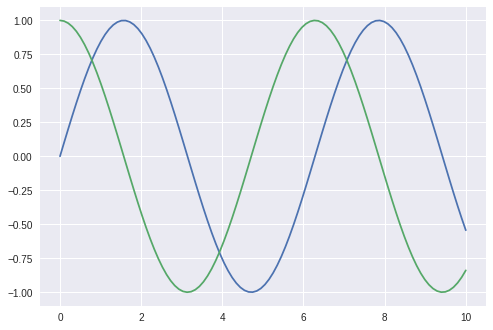

In [234]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
x = np.linspace(0, 10, 100)
 
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
 
plt.show()

## AEMEN'S SOLUTION

#### 1)	Number of sales by "brand" over time


In [235]:
# Checking different brands in dataset
a = df['brand'].unique()
print (a)

['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]


In [236]:
# Conversion of date column and creation of month & year columns
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['year'], df['month'] = df['transaction_date'].dt.year, df['transaction_date'].dt.month
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017,2
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017,5
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017,10
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017,8
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017,1
5,6,25,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,39031.0,2017,8
6,7,22,1542,2017-04-21,True,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0,2017,4
7,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,1292.84,$13.44,39915.0,2017,7
8,9,67,1305,2017-10-08,False,Approved,Solex,Standard,medium,large,1071.23,$380.74,33455.0,2017,10
9,10,12,3262,2017-08-30,True,Approved,WeareA2B,Standard,medium,medium,1231.15,$161.60,38216.0,2017,8


In [237]:
# Adding sales columns to count total transactions per brand, year and month
df['sales'] = df.groupby(['brand','year','month'])[['product_id']].transform('sum')
df.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month,sales
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017,2,13834.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017,5,10120.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017,10,11979.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,$381.10,36145.0,2017,8,12086.0
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,$709.48,42226.0,2017,1,12680.0
5,6,25,2339,2017-08-03,True,Approved,Giant Bicycles,Road,medium,medium,1538.99,$829.65,39031.0,2017,8,13522.0
6,7,22,1542,2017-04-21,True,Approved,WeareA2B,Standard,medium,medium,60.34,$45.26,34165.0,2017,4,14099.0
7,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,1292.84,$13.44,39915.0,2017,7,14392.0
8,9,67,1305,2017-10-08,False,Approved,Solex,Standard,medium,large,1071.23,$380.74,33455.0,2017,10,15037.0
9,10,12,3262,2017-08-30,True,Approved,WeareA2B,Standard,medium,medium,1231.15,$161.60,38216.0,2017,8,16765.0


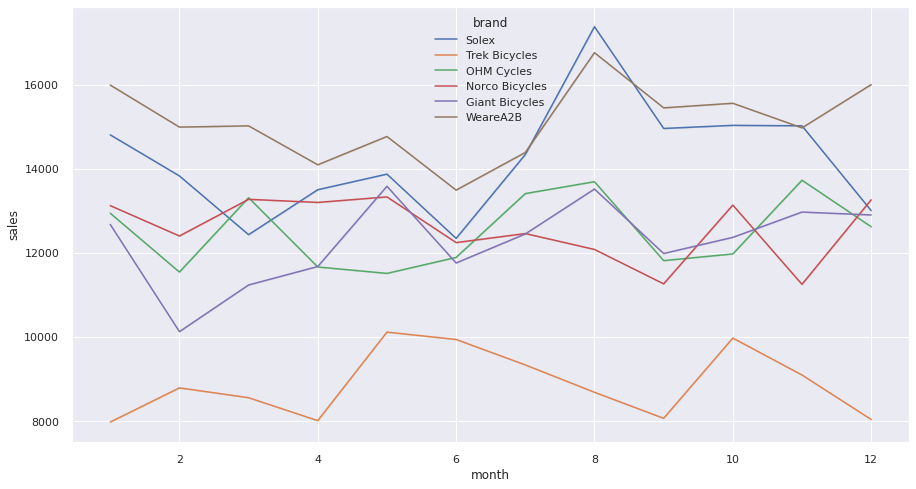

In [238]:
# Supporting graph (assuming it is acceptable to import seaborn as it utilizes matplotlib)
import seaborn as sns

x = df['month']
y = df['sales']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df, x=x, y=y, hue="brand")

#### 2) Distribution of the standard_cost


In [239]:
# Checking if cost is numeric value
df.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                       object
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                      object
product_first_sold_date           float64
year                                int64
month                               int64
sales                             float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba83c09250>]],
      dtype=object)

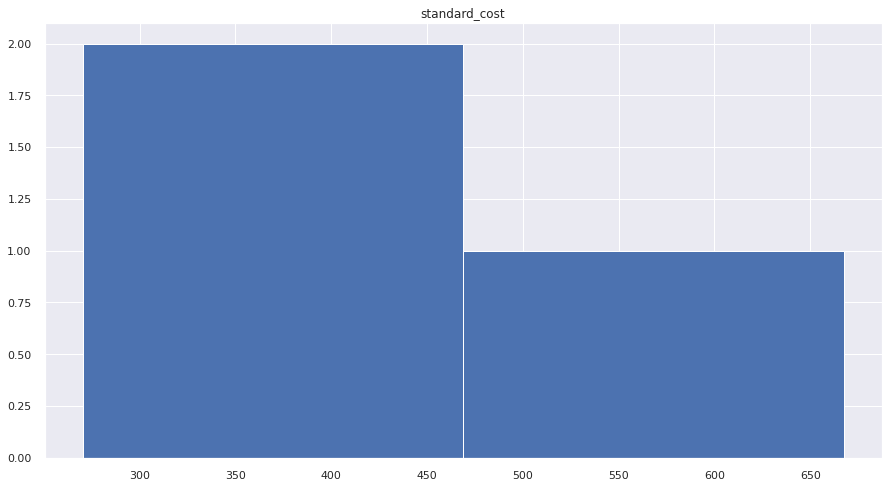

In [240]:
# Convert standard_cost to float
df['standard_cost'] = pd.to_numeric(df['standard_cost'], errors='coerce')

df.hist(column='standard_cost', bins=2)

#### 3) Distribution of the list_price conditioned on the "product_line"

Text(0.5, 0, 'List Price')

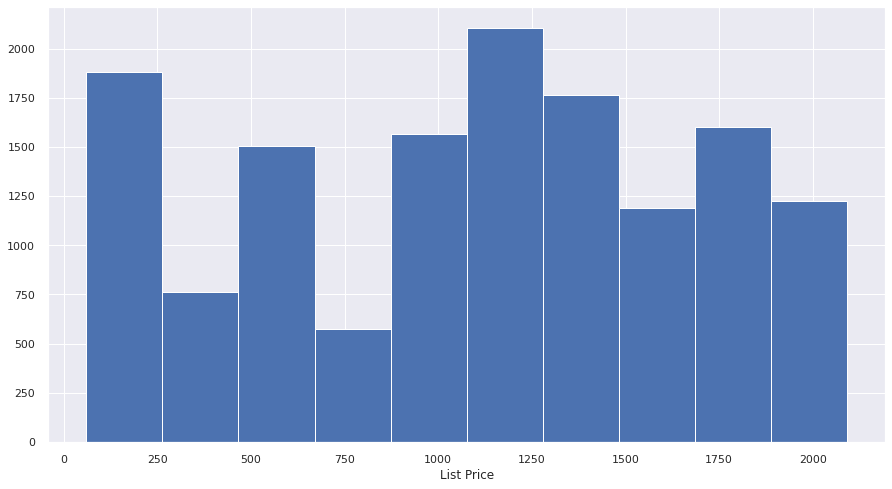

In [241]:
## Assuming product line = Standard (but can be modified as need be)
df_filter = df[df['product_line'] == 'Standard']

fig, ax = plt.subplots()
plt.hist(df_filter['list_price'])

ax.set_xlabel('List Price')

#### 4) Which user has bought the most items? (show in a figure)

In [242]:
# Customer with IDs 2476, 2183 & 1068 have bought the most items (highest count of transactions)
table = pd.pivot_table(data=df,index='customer_id',values='transaction_id',aggfunc=np.count_nonzero)
table = table.sort_values(by=['transaction_id'],ascending=False).head(10)
table

,transaction_id
customer_id,
2476,14
2183,14
1068,14
1672,13
2548,13
2912,13
637,13
3232,13
2464,13


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


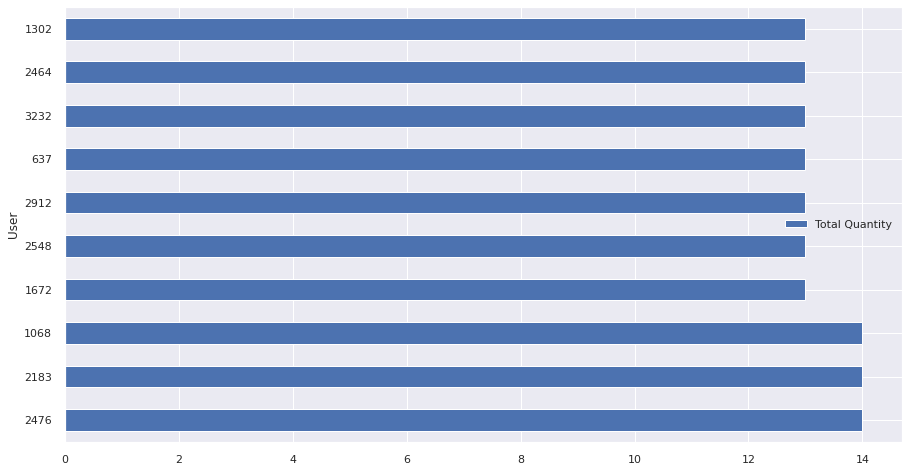

In [243]:
# Supporting graph
top = (df.groupby('customer_id')['list_price', 'transaction_id'].agg({'list_price': 'sum', 'transaction_id': 'count'})
          .sort_values(by='transaction_id', ascending=False))[:10].reset_index()
top.rename(columns={'customer_id': 'User', 'list_price': 'Total Spent', 'transaction_id': 'Total Quantity'}, inplace=True)

top.plot(kind='barh', y="Total Quantity", x="User")


#### 5) Which user has spent the most? (show in a figure)

In [244]:
# Customer with ID 2183 has spent bought the most (highest sum of list_price)
table2 = pd.pivot_table(data=df,index='customer_id',values='list_price',aggfunc=np.sum)
table2 = table2.sort_values(by=['list_price'],ascending=False).head(10)
table2

,list_price
customer_id,
2183,19071.32
1129,18349.27
1597,18052.68
941,17898.46
2788,17258.94
936,17160.24
1887,17133.93
1302,17035.83
1140,16199.24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


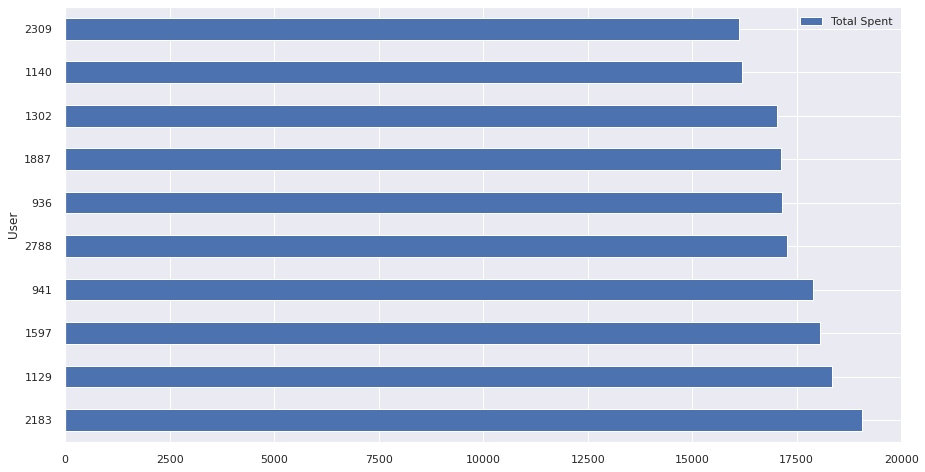

In [245]:
# Supporting graph
top10 = (df.groupby('customer_id')['list_price', 'transaction_id'].agg({'list_price': 'sum', 'transaction_id': 'count'})
          .sort_values(by='list_price', ascending=False))[:10].reset_index()
top10.rename(columns={'customer_id': 'User', 'list_price': 'Total Spent', 'transaction_id': 'Total Quantity'}, inplace=True)

top10.plot(kind='barh', y="Total Spent", x="User")